# Name: Vijay Singh

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problem Statement:
##### We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
- This is a simple linear regression task as it involves just 2 variables.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [18]:
df=pd.read_csv("student.csv")
print("Data loaded Sucessfully")
df.head()

Data loaded Sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
df.shape

(25, 2)

In [20]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### Correlation Analysis

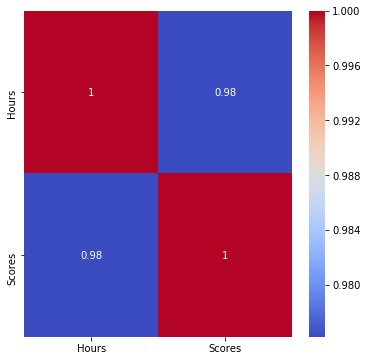

In [24]:
correlation = df.corr()
plt.figure(figsize = (6 , 6))
sns.heatmap(correlation, cmap = "coolwarm", annot =True)

# Data Visualization

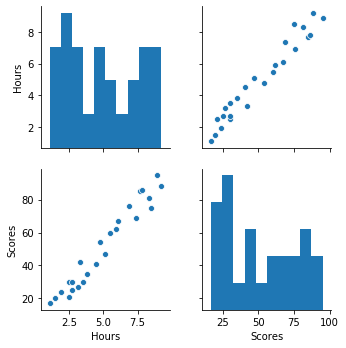

In [15]:
sns.pairplot(df)

- From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

##### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [27]:
x = (df.loc[:, df.columns != 'Scores']) #input data
y = (df.loc[:, df.columns == 'Scores']) #ground truth

-  Next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [29]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9
22,3.8
17,1.9
24,7.8
23,6.9


### Apply the Algorithm
- Now, finally the time to train our algorithm.

In [31]:
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(x_train, y_train) 
print("Training completed")

Training completed


##### Plotting the Regression Line

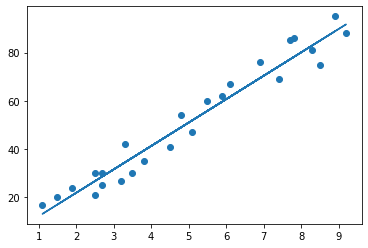

In [34]:
res = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, res);
plt.show()

### Testing  Model

In [36]:
y_pred = reg.predict(x_test)

In [45]:
y_pred

array([[17.04289179],
       [33.51695377],
       [74.21757747],
       [26.73351648],
       [59.68164043],
       [39.33132858],
       [20.91914167],
       [78.09382734],
       [69.37226512]])

### Evaluating the model

The final step is to evaluate the performance of algorithm.

In [42]:
# calculating the classification accuracies
print("Training Accuracy :", reg.score(x_train, y_train))
print("Testing Accuracy :", reg.score(x_test, y_test)) 

Training Accuracy : 0.9501107277744313
Testing Accuracy : 0.955570080138813


In [47]:
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test, y_pred))

r2_score:  0.955570080138813


In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397438
